In [85]:
from nilearn import plotting
from nilearn.image import resample_img, mean_img,smooth_img
from nilearn import datasets
from nilearn.regions import RegionExtractor
from nilearn import image
import nibabel as nib
from nipype.interfaces import fsl
from nipype.interfaces.ants import N4BiasFieldCorrection, RegistrationSynQuick
from lib.zscore_norm import zscore_normalize
import numpy as np


atlas_folder = "G:/StrokeResearch/vascular territory template/"
data_test_folder = 'G:/StrokeResearch/vascular territory template/testcase/'
atl = atlas_folder+'mni_vascular_territories.nii.gz'


In [9]:
mni_terr = nib.load(atl)
print(mni_terr.shape)

(182, 218, 182)


In [30]:
test_img_1 = nib.load(data_test_folder+'PWI_1.nii.gz')
print(test_img_1.shape)

(207, 256, 26, 50)


In [25]:
np.max(mni_terr)

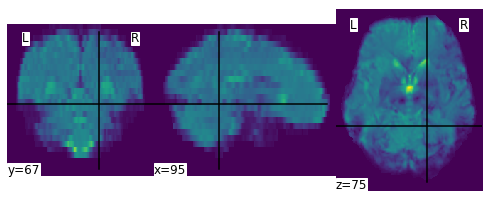

In [43]:
smooth_anat_img = smooth_img(test_img_1,fwhm=3)
plotting.plot_img(test_img_1.slicer[:,:,:,25],cut_coords=(95,67,75))

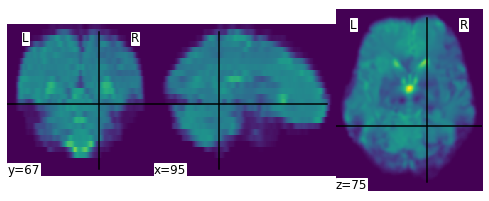

In [40]:
plotting.plot_img(smooth_anat_img.slicer[:,:,:,25],cut_coords=(95,67,75))

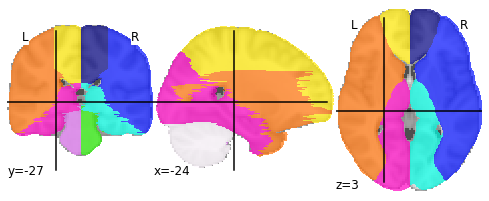

In [50]:
plotting.plot_roi(mni_terr)

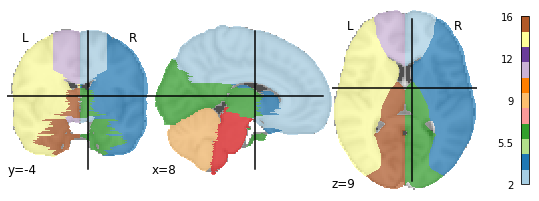

In [20]:
plotting.plot_roi(mni_terr,cut_coords=(8, -4, 9), colorbar=True, cmap='Paired')

c:\users\harry\anaconda3\envs\stroke_preprocessing\lib\site-packages\nilearn\plotting\displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


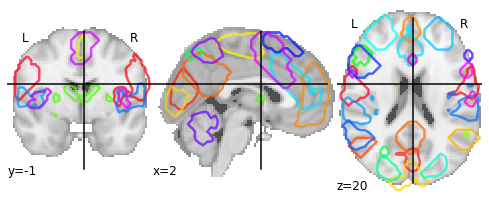

In [83]:
plotting.plot_prob_atlas(msdl)

In [86]:
extraction = RegionExtractor(msdl, min_region_size=100,
                             threshold=98, thresholding_strategy='percentile')
extraction.fit()
regions_img = extraction.regions_img_

DimensionError: Input data has incompatible dimensionality: Expected dimension is 4D and you provided a 3D image. See http://nilearn.github.io/manipulating_images/input_output.html.

In [68]:
atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas['maps']
# Loading atlas data stored in 'labels'
labels = atlas['labels']
msdl = nib.load(atlas_filename)
msdl.shape

c:\users\harry\anaconda3\envs\stroke_preprocessing\lib\site-packages\numpy\lib\npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


(40, 48, 35, 39)

In [105]:
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels
ho = nib.load(atlas_filename)
ho.shape


Dataset created in C:\Users\harry/nilearn_data\fsl



Downloaded 25716861 of 25716861 bytes (100.0%,    0.0s remaining) ...done. (4 seconds, 0 min)
Extracting data from C:\Users\harry/nilearn_data\fsl\e76a8cdb5571906307e94c1d8c134604\HarvardOxford.tgz..... done.


(91, 109, 91)

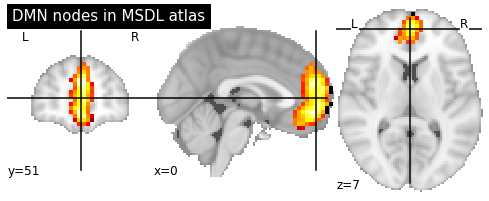

In [74]:
plotting.plot_stat_map(image.index_img(atlas_filename, 5),
                                 colorbar=False,
                                 title="DMN nodes in MSDL atlas")

In [138]:
from nilearn.input_data import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=ho, standardize=True,
                           memory='nilearn_cache', verbose=5)

# Here we go from nifti files to the signal time series in a numpy
# array. Note how we give confounds to be regressed out during signal
# extraction
time_series = masker.fit_transform(test_img_1)

[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('C:\Users\harry/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz')
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x00000169B1DDFF08>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x00000169EF98E1C8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x00000169F198E248>,
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, dtype=None, memory=Memory(location=nilearn_cache\joblib), memory_level=1, verbose=5)
[NiftiLabelsMasker.transform_single_imgs] Loading data fr

In [118]:
label_terr = ['Left_ACA',
                  'Left_MCA', 
                  'Left_PCA',
                  'Left_Pons_Medulla',
                  'Left_Cerebellum',
                  'Right_ACA',
                  'Right_MCA', 
                  'Right_PCA',
                  'Right_Pons_Medulla',
                  'Right_Cerebellum',
]

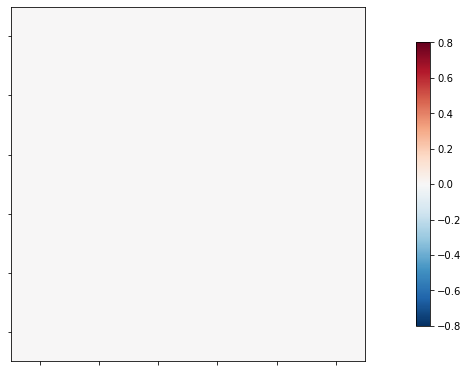

In [122]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Display the correlation matrix
import numpy as np
from nilearn import plotting
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, labels=label_terr, colorbar=True,
                     vmax=0.8, vmin=-0.8)

In [123]:
correlation_matrix

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

In [140]:
length(labels)

NameError: name 'length' is not defined